# Credit Risk Resampling Techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

# ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Read the Clean CSV

In [3]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1_Clean.csv')
df = pd.read_csv(file_path)
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


# Split the Data into Training and Testing

In [4]:
# Create our features
df_encoded = pd.get_dummies(df)
X = df_encoded.drop(["loan_status_low_risk", "loan_status_high_risk"], axis=1)

# Create our target
y = df[["loan_status"]]

In [5]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,issue_d_Mar-2019,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.0,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.177238,1.0,0.123879,0.876121,0.383161,0.616839,0.860340,0.139660,1.0,1.0
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.381873,0.0,0.329446,0.329446,0.486161,0.486161,0.346637,0.346637,0.0,0.0
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.0
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.0
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [6]:
# Check the balance of our target values
y['loan_status'].value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

### Note on Assessing Results

Majority Class is 'low_risk' (negative outcome), and Minority Class is 'high_risk' (positive outcome).

In [7]:
# Train - Test - Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(51612, 95)
(51612, 1)
(17205, 95)
(17205, 1)


# Logistic Regression without Resampling

In [41]:
# Instantiate Logistic Regression Model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
# Train classifier
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [44]:
# Generate predictions
predictions = classifier.predict(X_test)
predictions_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test.loan_status})
predictions_df = predictions_df.reset_index(drop=True)
predictions_df.head()

,Predicted,Actual
0,low_risk,low_risk
1,low_risk,low_risk
2,low_risk,low_risk
3,low_risk,low_risk
4,low_risk,low_risk


In [45]:
# Calculate balanced accuracy score
ba_score = balanced_accuracy_score(y_test, predictions)
ba_score

0.5057471264367817

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, columns=['Predicted Pos (High-Risk)', 'Predicted Neg (Low-Risk)'],
                    index=['Actual Pos (High-Risk)', 'Actual Neg (Low-Risk)'])
cm_df

,Predicted Pos (High-Risk),Predicted Neg (Low-Risk)
Actual Pos (High-Risk),1,86
Actual Neg (Low-Risk),0,17118


In [47]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       1.00      0.01      1.00      0.02      0.11      0.01        87
   low_risk       1.00      1.00      0.01      1.00      0.11      0.01     17118

avg / total       1.00      1.00      0.02      0.99      0.11      0.01     17205



# Oversampling

Compare two oversampling algorithms to determine which algorithm results in the best performance. Oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [9]:
# Resample the training data with the RandomOversampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({'loan_status': 1})

In [10]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [11]:
# Generate predictions
y_pred_ros = model.predict(X_test)
ros_pred_act_df = pd.DataFrame({'Predicted': y_pred_ros, 'Actual': y_test.loan_status})
ros_pred_act_df = ros_pred_act_df.reset_index(drop=True)
ros_pred_act_df.head()

,Predicted,Actual
0,high_risk,low_risk
1,high_risk,low_risk
2,high_risk,low_risk
3,high_risk,low_risk
4,high_risk,low_risk


In [12]:
# Calculated the balanced accuracy score
ros_ba_score = balanced_accuracy_score(y_test, y_pred_ros)
ros_ba_score

0.6490083034192683

In [13]:
# Display the confusion matrix
ros_cm = confusion_matrix(y_test, y_pred_ros)
ros_cm_df = pd.DataFrame(ros_cm, columns=['Predicted Pos (High-Risk)', 'Predicted Neg (Low-Risk)'],
                    index=['Actual Pos (High-Risk)', 'Actual Neg (Low-Risk)'])
ros_cm_df

,Predicted Pos (High-Risk),Predicted Neg (Low-Risk)
Actual Pos (High-Risk),52,35
Actual Neg (Low-Risk),5130,11988


In [14]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_ros))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.60      0.70      0.02      0.65      0.41        87
   low_risk       1.00      0.70      0.60      0.82      0.65      0.42     17118

avg / total       0.99      0.70      0.60      0.82      0.65      0.42     17205



### SMOTE Oversampling

In [15]:
# Resample the training data with SMOTE
X_resampled2, y_resampled2 = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)
Counter(y_resampled2)

Counter({'loan_status': 1})

In [16]:
# Train the Logistic Regression model using the resampled data
model_smote = LogisticRegression(solver='lbfgs', random_state=1)
model_smote.fit(X_resampled2, y_resampled2)

LogisticRegression(random_state=1)

In [17]:
# Generate predictions
y_pred_smote = model_smote.predict(X_test)
smote_pred_act_df = pd.DataFrame({'Predicted': y_pred_smote, 'Actual': y_test.loan_status})
smote_pred_act_df = smote_pred_act_df.reset_index(drop=True)
smote_pred_act_df.head()

,Predicted,Actual
0,high_risk,low_risk
1,high_risk,low_risk
2,low_risk,low_risk
3,high_risk,low_risk
4,high_risk,low_risk


In [18]:
# Calculated the balanced accuracy score
smote_ba_score = balanced_accuracy_score(y_test, y_pred_smote)
smote_ba_score

0.6259120264613575

In [19]:
# Display the confusion matrix
smote_cm = confusion_matrix(y_test, y_pred_smote)
smote_cm_df = pd.DataFrame(smote_cm, columns=['Predicted Pos (High-Risk)', 'Predicted Neg (Low-Risk)'],
                    index=['Actual Pos (High-Risk)', 'Actual Neg (Low-Risk)'])
smote_cm_df

,Predicted Pos (High-Risk),Predicted Neg (Low-Risk)
Actual Pos (High-Risk),55,32
Actual Neg (Low-Risk),6511,10607


In [20]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_smote))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.63      0.62      0.02      0.63      0.39        87
   low_risk       1.00      0.62      0.63      0.76      0.63      0.39     17118

avg / total       0.99      0.62      0.63      0.76      0.63      0.39     17205



# Undersampling

Test an undersampling algorithms to determine which algorithm results in the best performance compared to the oversampling algorithms above. Undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [21]:
# Resample the data using the ClusterCentroids resampler
cc = ClusterCentroids(random_state=1)
X_resampled3, y_resampled3 = cc.fit_resample(X_train, y_train)
Counter(y_resampled3)

Counter({'loan_status': 1})

In [22]:
# Train the Logistic Regression model using the resampled data
model3 = LogisticRegression(solver='lbfgs', random_state=1)
model3.fit(X_resampled3, y_resampled3)

LogisticRegression(random_state=1)

In [23]:
# Generate predictions
y_pred_cc = model3.predict(X_test)
cc_pred_act_df = pd.DataFrame({'Prediction': y_pred_cc, 'Actual': y_test.loan_status})
cc_pred_act_df = cc_pred_act_df.reset_index(drop=True)
cc_pred_act_df.head()

,Prediction,Actual
0,high_risk,low_risk
1,high_risk,low_risk
2,high_risk,low_risk
3,high_risk,low_risk
4,low_risk,low_risk


In [24]:
# Calculated the balanced accuracy score
cc_ba_score = balanced_accuracy_score(y_test, y_pred_cc)
cc_ba_score

0.5292734810302525

In [25]:
# Display the confusion matrix
cc_cm = confusion_matrix(y_test, y_pred_cc)
cc_cm_df = pd.DataFrame(cc_cm, columns=['Predicted Pos (High-Risk)', 'Predicted Neg (Low-Risk)'],
                    index=['Actual Pos (High-Risk)', 'Actual Neg (Low-Risk)'])
cc_cm_df

,Predicted Pos (High-Risk),Predicted Neg (Low-Risk)
Actual Pos (High-Risk),53,34
Actual Neg (Low-Risk),9426,7692


In [26]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_cc))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.61      0.45      0.01      0.52      0.28        87
   low_risk       1.00      0.45      0.61      0.62      0.52      0.27     17118

avg / total       0.99      0.45      0.61      0.62      0.52      0.27     17205



# Combination (Over and Under) Sampling

Test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. Resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [27]:
# Resample the training data with SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled4, y_resampled4 = smote_enn.fit_resample(X, y)
Counter(y_resampled4)

Counter({'loan_status': 1})

In [28]:
# Train the Logistic Regression model using the resampled data
model4 = LogisticRegression(solver='lbfgs', random_state=1)
model4.fit(X_resampled4, y_resampled4)

LogisticRegression(random_state=1)

In [29]:
# Calculated the balanced accuracy score
y_pred_smoteenn = model4.predict(X_test)
smoteenn_ba_score = balanced_accuracy_score(y_test, y_pred_smoteenn)
smoteenn_ba_score

0.6375241226214794

In [30]:
# Display the confusion matrix
smoteenn_cm = confusion_matrix(y_test, y_pred_smoteenn)
smoteenn_cm_df = pd.DataFrame(smoteenn_cm, columns=['Predicted Pos (High-Risk)', 'Predicted Neg (Low-Risk)'],
                    index=['Actual Pos (High-Risk)', 'Actual Neg (Low-Risk)'])
smoteenn_cm_df

,Predicted Pos (High-Risk),Predicted Neg (Low-Risk)
Actual Pos (High-Risk),61,26
Actual Neg (Low-Risk),7294,9824


In [31]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_smoteenn))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.01      0.70      0.57      0.02      0.63      0.41        87
   low_risk       1.00      0.57      0.70      0.73      0.63      0.40     17118

avg / total       0.99      0.57      0.70      0.72      0.63      0.40     17205



# Analysis

## Consolidate and Compare Balanced Accuracy Scores, Precision, and Recall (Sensitivity)

### ROC Curves

In [65]:
pred_proba = classifier.predict_proba(X_test)
pred_proba

array([[7.53430092e-02, 9.24656991e-01],
       [2.89159387e-02, 9.71084061e-01],
       [3.61629381e-02, 9.63837062e-01],
       ...,
       [8.25484092e-02, 9.17451591e-01],
       [8.74964499e-04, 9.99125036e-01],
       [6.12620312e-04, 9.99387380e-01]])

In [67]:
predictions_df.Predicted.value_counts()

low_risk     17204
high_risk        1
Name: Predicted, dtype: int64

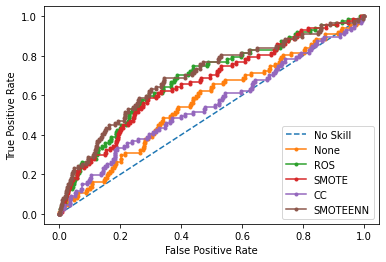

In [64]:
# ROC

# Plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# No Resampling
# Retrieve probabilities for positive class
predictions_proba = [row[0] for row in classifier.predict_proba(X_test)]
# Calculate ROC curve for model
fpr, tpr, _ = roc_curve(y_test, predictions_proba, pos_label='high_risk')
# Plot ROC
plt.plot(fpr, tpr, marker='.', label='None')

# Naive Random Oversampling
y_pred_proba = [row[0] for row in model.predict_proba(X_test)]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='high_risk')
pyplot.plot(fpr, tpr, marker='.', label='ROS')

# SMOTE
smote_proba = [row[0] for row in model_smote.predict_proba(X_test)]
fpr, tpr, _ = roc_curve(y_test, smote_proba, pos_label='high_risk')
pyplot.plot(fpr, tpr, marker='.', label='SMOTE')

# ClusterCentroids
cc_proba = [row[0] for row in model3.predict_proba(X_test)]
fpr, tpr, _ = roc_curve(y_test, cc_proba, pos_label='high_risk')
pyplot.plot(fpr, tpr, marker='.', label='CC')

# SMOTEENN
smoteenn_proba = [row[0] for row in model4.predict_proba(X_test)]
fpr, tpr, _ = roc_curve(y_test, smoteenn_proba, pos_label='high_risk')
pyplot.plot(fpr, tpr, marker='.', label='SMOTEENN')

# Add legend, display
plt.legend()
plt.show()

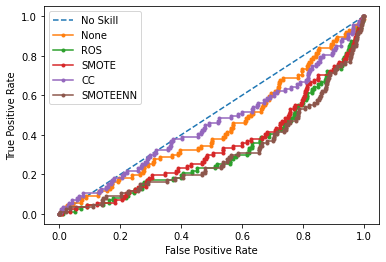

In [50]:
# ROC

# Plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# No Resampling
# Retrieve probabilities for positive class
predictions_proba = classifier.predict_proba(X_test)[:, 1]
# Calculate ROC curve for model
fpr, tpr, _ = roc_curve(y_test, predictions_proba, pos_label='high_risk')
# Plot ROC
plt.plot(fpr, tpr, marker='.', label='None')

# Naive Random Oversampling
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='high_risk')
pyplot.plot(fpr, tpr, marker='.', label='ROS')

# SMOTE
smote_proba = model_smote.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, smote_proba, pos_label='high_risk')
pyplot.plot(fpr, tpr, marker='.', label='SMOTE')

# ClusterCentroids
cc_proba = model3.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, cc_proba, pos_label='high_risk')
pyplot.plot(fpr, tpr, marker='.', label='CC')

# SMOTEENN
smoteenn_proba = model4.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, smoteenn_proba, pos_label='high_risk')
pyplot.plot(fpr, tpr, marker='.', label='SMOTEENN')

# Add legend, display
plt.legend()
plt.show()